## This Script Contains the Following Points:
#### 1. Importing Libraries 
#### 2. Load MNIST Data & Data Split 
#### 3. Plot Images
#### 4. Preprocess Input Data
#### 5. Preprocess Class Labels
#### 6. Fit Model on Training Data
#### 7. Evaluate Model on Test Data

# 1. Importing Libraries & Data

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [9]:
%matplotlib inline

# Turning off warning feature
warnings.filterwarnings('ignore')

In [10]:
tf.random.set_seed(42)

# 2. Load MNIST Data & Data Split 

In [12]:
hand = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [20]:
(X_train, y_train), (X_test, y_test) = hand

In [22]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [24]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [26]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [28]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# 3. Plot Images

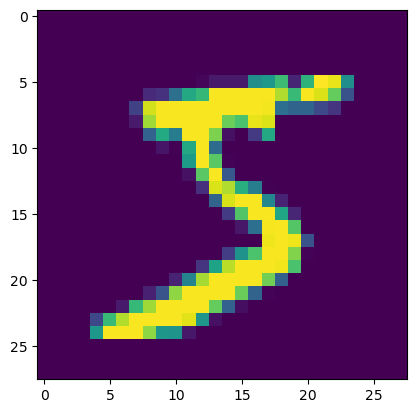

In [31]:
plt.imshow(X_train[0])

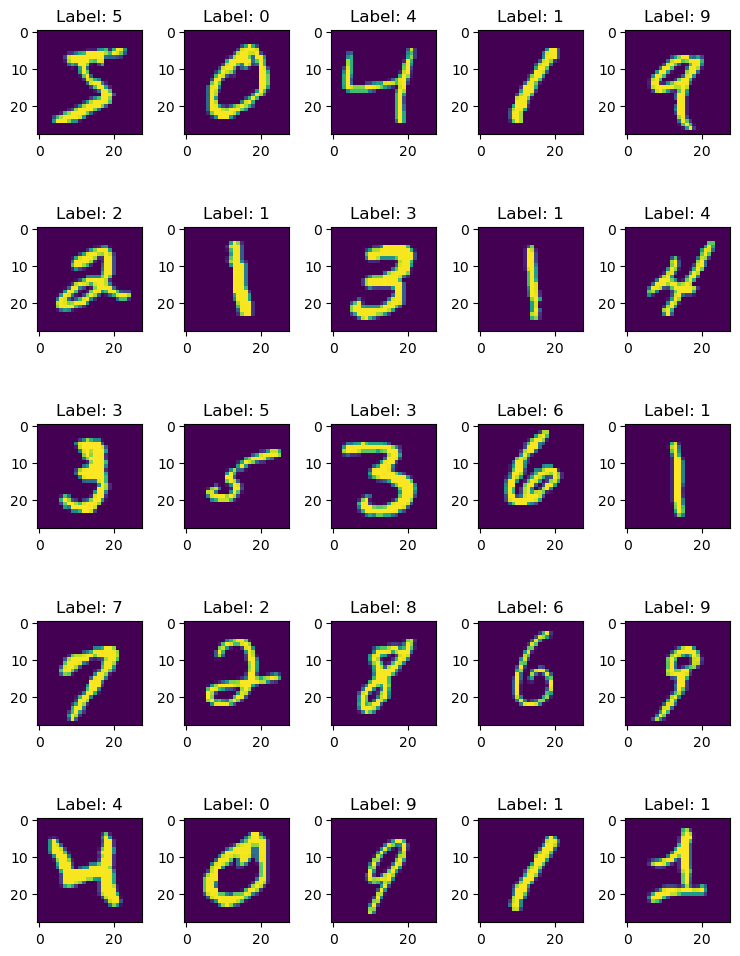

In [33]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()

# 4. Preprocess Input Data

In [36]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [38]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [40]:
X_train /= 255
X_test /= 255

# 5. Preprocess Class Labels

In [43]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [45]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [47]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [49]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Fit Model on Training Data

In [53]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8749 - loss: 0.3932
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9739 - loss: 0.0893
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9792 - loss: 0.0690
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9839 - loss: 0.0549
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9857 - loss: 0.0461
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9886 - loss: 0.0385
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9885 - loss: 0.0355
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9889 - loss: 0.0359
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9904 - loss: 0.0304
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9913 - loss: 0.0259


# 7. Evaluate Model on Test Data

In [56]:
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9909 - loss: 0.0359


In [58]:
# Predicting first 4 images in the test set

model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[7.1025367e-17, 5.3184419e-12, 1.6474735e-11, 3.3391577e-12,
        4.4785270e-15, 4.1970379e-16, 6.7195293e-22, 1.0000000e+00,
        1.3284791e-15, 1.1170680e-13],
       [2.9418681e-14, 2.3433165e-13, 1.0000000e+00, 4.9592939e-18,
        2.1946424e-21, 3.2819355e-25, 1.8388455e-16, 1.8494452e-18,
        6.6089053e-19, 3.3092822e-23],
       [2.2396802e-12, 1.0000000e+00, 7.6343136e-09, 3.6100894e-13,
        6.9735377e-09, 1.3255066e-09, 6.8243600e-10, 2.2513593e-09,
        3.6929453e-09, 9.0266180e-12],
       [9.9999988e-01, 1.8079920e-14, 4.7692167e-10, 5.2134052e-12,
        1.2815738e-11, 6.7402290e-12, 1.2977992e-07, 3.5318393e-13,
        9.7150468e-11, 1.1318925e-09]], dtype=float32)

In [60]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([1., 1., 1., 1.], dtype=float32)

In [62]:
# Printing actual results for first 4 images in test set

y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [64]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 974    0    1    0    0    0    3    0    1    1]
 [   0 1131    2    1    0    1    0    0    0    0]
 [   1    1 1025    0    0    0    0    5    0    0]
 [   0    0    2 1005    0    2    0    0    1    0]
 [   0    0    0    0  973    0    3    0    3    3]
 [   0    0    0    4    0  886    2    0    0    0]
 [   4    2    0    0    2    5  942    0    3    0]
 [   1    2    3    1    0    0    0 1020    1    0]
 [   0    0    2    1    0    0    0    2  967    2]
 [   2    1    0    3    3    6    0    4    4  986]]


# 8. Importing Handwritten Numbers

In [67]:
# Creating path to project folder

path = r'/Users/kimkmiz/Desktop/ClimateWins'

In [73]:
# Importing image 9

img = Image.open(os.path.join(path, 'handwritten_numbers', '9.png'))
print(img.format)
print(img.size)
print(img.mode)

PNG
(506, 420)
RGBA


In [75]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [77]:
testimg = asarray(img2)

In [79]:
print(testimg.shape)

(28, 28, 4)


In [87]:
testimg = testimg.reshape(1, 28, 28, 1)

ValueError: cannot reshape array of size 3136 into shape (1,28,28,1)

In [95]:
# Images not properly in grayscale, need to fix this.

In [85]:
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 58.9 MB/s eta 0:00:0000:0100:01


In [89]:
import cv2
testimg = cv2.cvtColor(testimg, cv2.COLOR_RGBA2GRAY)  # Convert from RGBA to Grayscale
testimg = testimg.reshape(1, 28, 28, 1)  # Reshape to the desired format

In [91]:
testimg = testimg.reshape(1, 28, 28, 1)

In [93]:
# Predicting the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4


In [97]:
# Importing next number image

In [101]:
img = Image.open(os.path.join(path,'handwritten_numbers', '1.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(504, 446)
RGBA


In [103]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [105]:
testimg = asarray(img2)

In [109]:
testimg = cv2.cvtColor(testimg, cv2.COLOR_RGBA2GRAY)  # Convert from RGBA to Grayscale
testimg = testimg.reshape(1, 28, 28, 1)  # Reshape to the desired format

In [111]:
# Predicting the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1


In [113]:
# Importing next number image

img = Image.open(os.path.join(path,'handwritten_numbers', '2.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(506, 420)
RGBA


In [115]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [119]:
testimg = testimg.reshape(1, 28, 28, 1)

In [121]:
# Predicting the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1


In [123]:
# Importing next number image

img = Image.open(os.path.join(path,'handwritten_numbers', '3.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(506, 420)
RGBA


In [125]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [127]:
testimg = asarray(img2)

In [129]:
print(testimg.shape)

(28, 28, 4)


In [133]:
testimg = cv2.cvtColor(testimg, cv2.COLOR_RGBA2GRAY)  # Convert from RGBA to Grayscale
testimg = testimg.reshape(1, 28, 28, 1)  # Reshape to the desired format

In [135]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
3


In [137]:
# Importing next number image

img = Image.open(os.path.join(path,'handwritten_numbers', '8.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(506, 420)
RGBA


In [139]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [141]:
testimg = asarray(img2)

In [143]:
print(testimg.shape)

(28, 28, 4)


In [147]:
testimg = cv2.cvtColor(testimg, cv2.COLOR_RGBA2GRAY)  # Convert from RGBA to Grayscale
testimg = testimg.reshape(1, 28, 28, 1)  # Reshape to the desired format

In [149]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8


In [151]:
# Importing next number image

img = Image.open(os.path.join(path,'handwritten_numbers', '4.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(396, 420)
RGBA


In [153]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [157]:
testimg = asarray(img2)

In [159]:
print(testimg.shape)

(28, 28, 4)


In [163]:
testimg = cv2.cvtColor(testimg, cv2.COLOR_RGBA2GRAY)  # Convert from RGBA to Grayscale
testimg = testimg.reshape(1, 28, 28, 1)  # Reshape to the desired format

In [165]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4


In [167]:
# Importing next number image

img = Image.open(os.path.join(path,'handwritten_numbers', '7.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(506, 420)
RGBA


In [169]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [171]:
testimg = asarray(img2)

In [173]:
print(testimg.shape)

(28, 28, 4)


In [175]:
testimg = cv2.cvtColor(testimg, cv2.COLOR_RGBA2GRAY)  # Convert from RGBA to Grayscale
testimg = testimg.reshape(1, 28, 28, 1)  # Reshape to the desired format

In [177]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3


In [179]:
# Importing next number image

img = Image.open(os.path.join(path,'handwritten_numbers', '10.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(506, 420)
RGBA


In [181]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [183]:
testimg = asarray(img2)

In [185]:
print(testimg.shape)

(28, 28, 4)


In [187]:
testimg = cv2.cvtColor(testimg, cv2.COLOR_RGBA2GRAY)  # Convert from RGBA to Grayscale
testimg = testimg.reshape(1, 28, 28, 1)  # Reshape to the desired format

In [189]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6


In [191]:
# Importing next number image

img = Image.open(os.path.join(path,'handwritten_numbers', '6.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(506, 420)
RGBA


In [193]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [195]:
testimg = asarray(img2)

In [197]:
print(testimg.shape)

(28, 28, 4)


In [199]:
testimg = cv2.cvtColor(testimg, cv2.COLOR_RGBA2GRAY)  # Convert from RGBA to Grayscale
testimg = testimg.reshape(1, 28, 28, 1)  # Reshape to the desired format

In [201]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6


In [203]:
# Importing next number image

img = Image.open(os.path.join(path,'handwritten_numbers', '5.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(506, 420)
RGBA


In [205]:
newsize = (28,28)
img3 = img.resize(newsize)
img3

In [207]:
testimg = asarray(img3)

In [209]:
print(testimg.shape)

(28, 28, 4)


In [211]:
testimg = cv2.cvtColor(testimg, cv2.COLOR_RGBA2GRAY)  # Convert from RGBA to Grayscale
testimg = testimg.reshape(1, 28, 28, 1)  # Reshape to the desired format

In [213]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
5


In [215]:
# Importing next number image - trying 2 again

img = Image.open(os.path.join(path,'handwritten_numbers', '2.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(506, 420)
RGBA


In [217]:
newsize = (28,28)
img4 = img.resize(newsize)
img4

In [219]:
testimg = asarray(img4)

In [221]:
print(testimg.shape)

(28, 28, 4)


In [223]:
testimg = cv2.cvtColor(testimg, cv2.COLOR_RGBA2GRAY)  # Convert from RGBA to Grayscale
testimg = testimg.reshape(1, 28, 28, 1)  # Reshape to the desired format

In [225]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2


In [227]:
# Importing next number image - trying 9 again

img = Image.open(os.path.join(path,'handwritten_numbers', '9.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(506, 420)
RGBA


In [229]:
newsize = (28,28)
img5 = img.resize(newsize)
img5

In [231]:
testimg = asarray(img5)

In [233]:
print(testimg.shape)

(28, 28, 4)


In [235]:
testimg = cv2.cvtColor(testimg, cv2.COLOR_RGBA2GRAY)  # Convert from RGBA to Grayscale
testimg = testimg.reshape(1, 28, 28, 1)  # Reshape to the desired format

In [237]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
4
